<a href="https://colab.research.google.com/github/audit-ti/pjj-pengolahan-data-python/blob/main/04.%20Data%20Preparation/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>DATA PREPARATION</center>

# Pengantar 

> Suatu proses yang dilakukan untuk membuat data mentah menjadi data yang berkualitas dan siap untuk digunakan dalam proses analisis atau permodelan. 

## Data preparation dalam CRISP-DM.

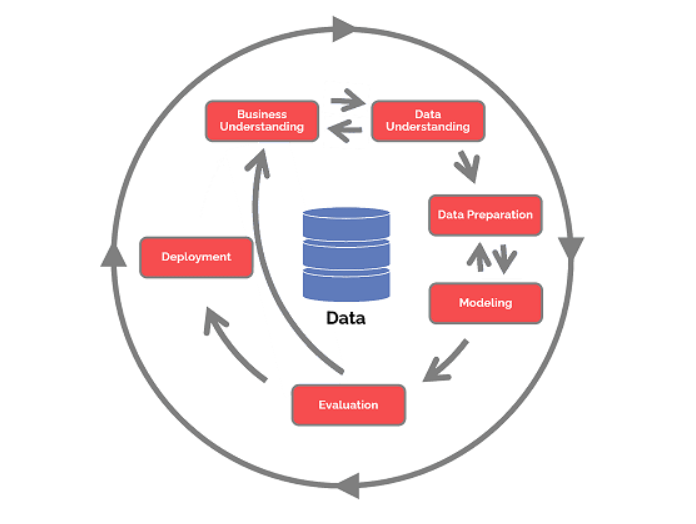!



> The data preparation phase covers all activities to construct the final dataset (data that will be fed into the modeling tools) from the initial raw data. Data preparation tasks are likely to be ```performed multiple times and not in any prescribed order```. Tasks include table, record and attribute selection as well as transformation and cleaning of data for
modeling tools.

Sumber: Chapman et al (2000)

## Tugas yang memakan waktu

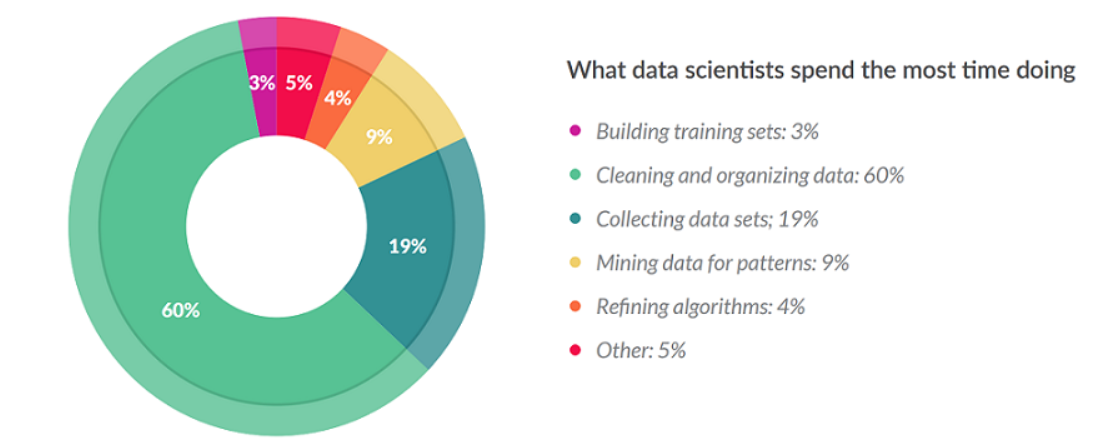

[Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=3bc50d1f6f63) menyebutkan bahwa data preparation adalah pekerjaan yang paling membosankan dan menguras waktu, tenaga dan pikiran.

> Kunci: __SABAR !__ 

## Apa yang dikerjakan

> Get dataset, select data, clean data, construct data, integrate data, and format data Chapman et al (2000).

Dalam bentuk gambar: <br>
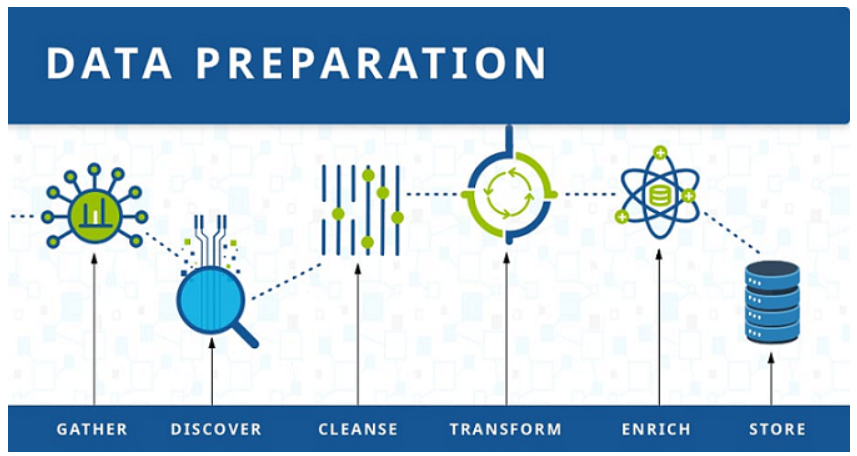

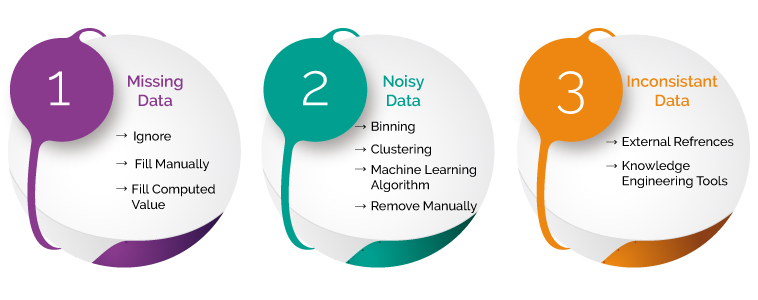


## Tools yang dibutuhkan

|Tools|Fungsi| 
|---|---|
|[Pandas](https://pandas.pydata.org/)|Mengolah dataset|
|[Regular Expression](https://docs.python.org/3/howto/regex.html)|Ekstraksi atau pencocokan pola teks|
|[regex101](https://regex101.com/)|Playground untuk regex|
|[Scikit-learn](https://scikit-learn.org/stable/auto_examples/index.html)|Fungsi data preparation|
|[missingno](https://anaconda.org/conda-forge/missingno)|Visualisasi missing value|

In [4]:
#!pip install missingno

# Load library
import pandas as pd
import re
import missingno as msno
%matplotlib inline

## Data yang digunakan

Kami tidak menggunakan single dataset untuk mendemokan semua proses pada data preparation. <br> 

Terdapat beberapa ragam dataset yang berbeda-beda sesuai dengan studi kasus. <br>

## Agenda Materi Ini

|Agenda|Yang dipelajari|
|---|---|
|Pandas for Data Wrangling|Pemahaman ppenggunaan pandas untuk mengolah data|
|Data Cleaning|Pemahaman mendalam tipe data, memperbaiki data dan bentuk DataFrame, menggabungkan DataFrame, menghapus duplicate data, menghapus missing data, dan membuat rekapitulasi data|
|Feature Engineering|Ekstaksi inisial dari kolom Name dan pengelompokkan penumpang berdasarkan kolom Age|
|Encoding|Merubah kolom Sex, Embarked, Initial, dan Age_group menjadi numerik|
|Regular Expression|Pemahaman regex token, menggunakan library RegEx, dan mengaplikasikan RegEx di Pandas|

## Materi Pengayaan

### List 
### List Comprehension
List comprehension merupakan ekspresi untuk mempermudah iterasi terhadap list, membuat kode yang lebih rapi dan pengolahan yang lebih efisien.

In [ ]:
#Contoh list comprehension

list1 = [1,2,3,4,5,6,7,8,9,10]
list_c = [x for x in list1]    # list comprehension
list_c

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
# List Comprehension diatas sama dengan penyataan for berikut:
list_for = []
for i in list1:
    list_for.append(i)
list_for

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**List Comprehension dengan Penambahan Conditional**

Menambahkan ekspresi yang lebih kompleks pada sebuah list comprehension, misalnya dengan menggunakan if.

In [ ]:
#Contoh 1: list comprehension dengan operasi *2 pada ekspresi dan pernyataan if setelah for
list1 = [1,2,3,4,5,6,7,8,9,10]
# apabila angka genap, maka x dikalikan 2
list_c = [x * 2 for x in list1 if x % 2 == 0]    
list_c

[4, 8, 12, 16, 20]

In [ ]:
#Contoh1 apabila pakai for
list_c = []
for x in list1:
    if x % 2 == 0:
        list_c.append(x * 2)
list_c

[4, 8, 12, 16, 20]

**Membuat Nested List dengan List Comprehension**

In [ ]:
NestedList = [[x for x in range(y,y+3)] for y in range(5)]    
NestedList

[[0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]]

**Mengakses Nested List dengan List Comprehension**

In [ ]:
AksesNested = [[x[0],x[1]] for x in NestedList]
AksesNested

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5]]

#### Latihan List Comprehension
**1. Menggunakan list comprehension buat list yang berisi angka 1 hingga 100**
****
**2 Ubah pernyataan dibawah ini menjadi list comprehension**
```python
list_a = [3,9,27,81,243]
list_b = []
for value in list_a:
    list_b.append(value/3)
list_b
```

**3 Ubah pernyataan dibawah ini menjadi list comprehension**
```python
list_1 = [x for x in range(100)]
list_2 = []
for value in list_1:
    if value < 25:
        list_2.append(value * 2)
list_2
```



In [ ]:
#Jawaban soal 1

In [ ]:
#Jawaban Soal 2

In [ ]:
#Jawaban Soal 3

# Pandas for Data Wrangling

Mempelajari fungsi-fungsi dasar yang dapat dilakukan menggunakan pandas dalam melakukan eksploarasi data. Materi ini merupakan tambahan dari materi sebelumnya

## Data Frame and Series

DataFrame adalah struktur data 2 dimensi yang berbentuk tabular (mempunyai baris dan kolom) pada Pandas

Series adalah struktur data 1 dimensi yang berbentuk tabular (mempunyai baris dan kolom) pada Pandas


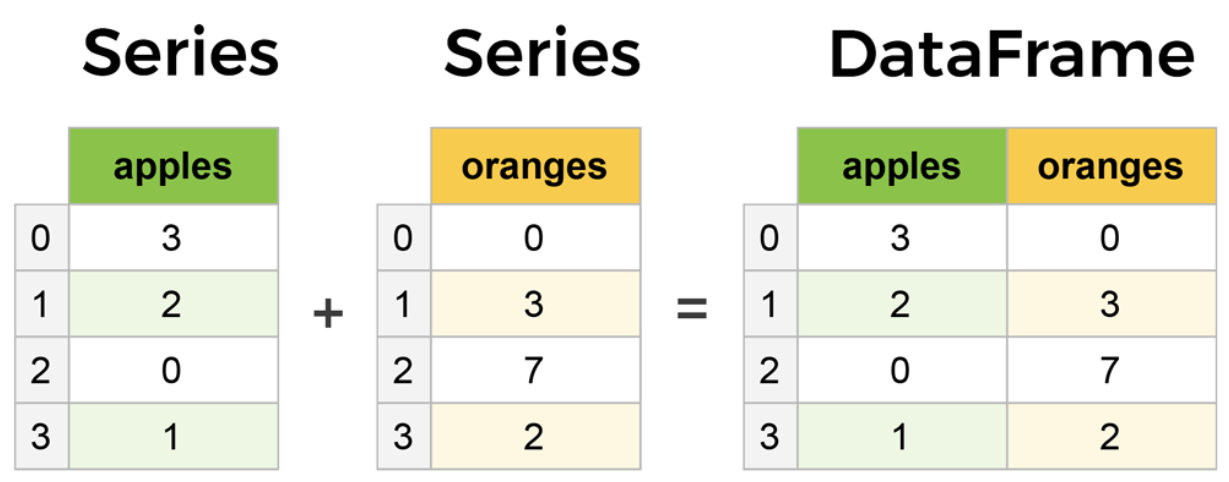!

## Dataframe Axis

A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns.

Series object has only one axis, so this parameter always equals 0 for it. 


Now it’s clear that Series and DataFrame share the same direction for “axis 0” – it goes along rows direction.

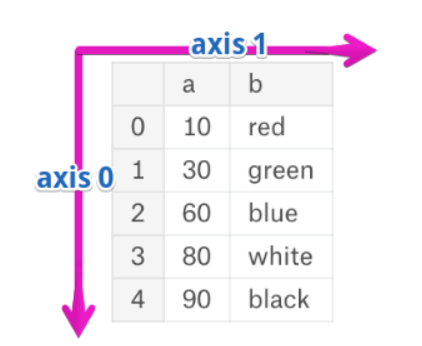

In [ ]:
#import pandas
import pandas as pd

#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/sales_data_types.csv')
df.head()

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Company,Rp.162500000.00,30.00%
1,552278,Smith Plumbing,Bandung,Company,"Rp101.200.000,00",10.00%
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000,25
3,249000,Brekke LTD,"Pasteur, Bandung",Company,Rp4900000.00,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000.00,-15.00%


##  Informasi DataFrame

```python
    dataframe.columns # daftar kolom pada dataframe 
    
    dataframe.info() # informasi dataframe, kolom tipe data dsb.
    
    dataframe.shape() # dimensi dataframe
    
    dataframe.size() # jumlah data pada dataframe
    
```

### Hint for Class/Function 

Use:
```python 
help(type(dataframe.columns))
```

## Selecting and Filtering Data

### Mengambil baris dan kolom

#### Mengambil seluruh baris dari sebagian kolom (row slicing)

Caranya adalah:
``` python
dataframe['namakolom']
```

``` python
dataframe.namakolom
```
Untuk mencari nama kolom:

``` python
dataframe.columns
```

In [ ]:
df.columns

Index(['Customer Number', 'Customer Name', 'Address', 'Type', 'Sales',
       'Percent Growth'],
      dtype='object')

#### Mengambil seluruh kolom dari sebagian baris (columns slicing)
Caranya adalah
``` python
 dataframe[index]
```

#### Mengambil sebagian baris pada sebagian kolom (row-column slicing)
Caranya adalah:

 ``` python
dataframe['namakolom']['index']
```

### Menggunakan .loc
> Memilih baris atau kolom dengan label tertentu dari index.

```python
dataframe1.loc["kolom1", "kolom2"]

dataframe1.loc["kolom1":"value1", "kolom2":"value2"]
```


In [ ]:
# kita akan coba mengakses sampai dengan index ke 4 (baris ke-5) 
# mulai dari Kolom 'Customer Name' s.d. kolom 'Type'
df.loc[:4, 'Customer Name':'Type']

,Customer Name,Address,Type
0,Quest Industry,Jakarta,Company
1,Smith Plumbing,Bandung,Company
2,ACME Industrial,Jakarta,Perusahaan
3,Brekke LTD,"Pasteur, Bandung",Company
4,Harbor Co,"Cilincing, Jakarta",Company


### Menggunakan iloc

> Memilih baris atau kolom dengan label tertentu dari posisi index (integers).

```python
dataframe1.iloc[baris, kolom]

dataframe1.iloc[start:end (baris), start:end(kolom)]
```

In [ ]:
# kita akan coba mengakses dari index ke-5 s.d. index ke-9 
# dari kolom 1 s.d. 5
df.iloc[5:10, 0:3]

,Customer Number,Customer Name,Address
5,565600,Berkah Jaya,Bandung
6,897440,Rafee Ahmad,Depok
7,123156,Reza Pratama,Jakarta
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta"
9,748952,Alexander Samiun,"Sleman, Jogjakarta"


### Filtering data

Cara pertama untuk melakukan filter adalah menggunakan ```conditional```.

```python
dataframe1[conditional] #yang nilainya true akan ditampilkan

```

Yang kedua menggunakan ```query```.

```python
df.query('20 < Age < 40')[:5]

```

In [ ]:
#Contoh

## Sorting Data

> Mengurutkan data berdasarkan valuenya.

Untuk melakukan sorting data pada DataFrame:
1. Hanya satu kolom:
```python
DataFrame.sort_values(by='', ascending=False)
```
2. Beberapa kolom:
```python
DataFrame.sort_values(["b", "c"], ascending = (False, True))
```

## Summarizing Data
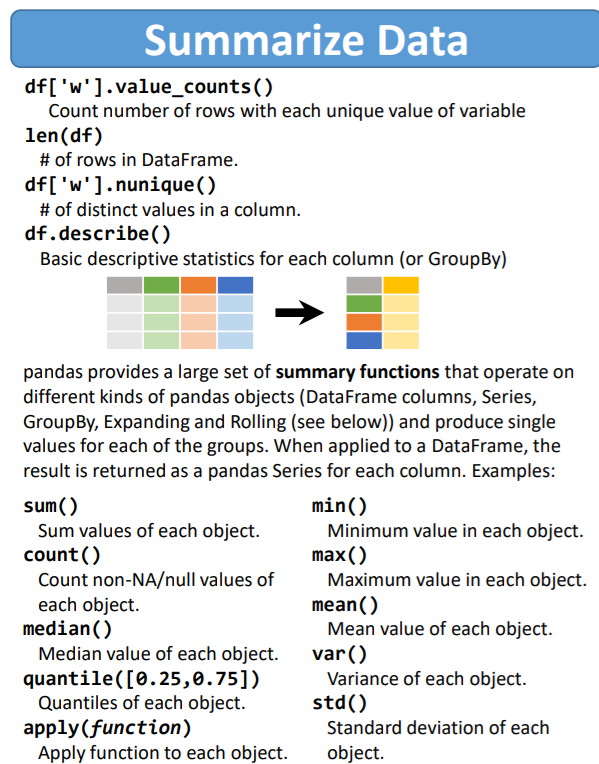

## String manipulations in Pandas

### Python String Method

- String merupakan tipe data "teks", didefinisikan dengan tanda kutip (' atau ").
- Jika menggunakan kutip dua " untuk definisi string, maka bisa digunakan kutip satu di dalam teks, begitu juga sebaliknya


Beberapa contoh string method di Python:

| Method       | Deskripsi                                                                                          |
|--------------|----------------------------------------------------------------------------------------------------|
| capitalize() | Ubah karakter pertama pada string menjadi kapital                                                  |
| find('str')       | Cari string di dalam suatu string, dengan outputnya adalah posisi indeks string tersebut ditemukan |
| lower()      | Mengubah semua karakter di string menjadi huruf kecil                                              |
| lstrip()     | Menghilangkan spasi berlebih pada bagian kiri string                                               |
| rstrip()     | Menghilangkan spasi berlebih pada bagian kanan string                                              |
| split('str')      | Memotong string pada karakter yang ditentukan, dan dioutput sebagai list                           |
| strip()      | Menghilangkan spasi berlebih pada semua sisi string                                                |
| swapcase()   | Mengganti huruf besar pada string menjadi kecil, dan sebaliknya                                    |
| title()      | Mengubah huruf pertama pada tiap kata didalam string sebagai huruf kapital                         |
| upper()      | Mengubah semua karakter di string menjadi huruf besar           

In [ ]:
#Contoh

#### Latihan Python String Method

In [ ]:
# buatlah semua karakter dalam string menjadi huruf kecil
text = 'LIveRpoOl is ThE BeSt PrEmiEr LeAgUe TeAm'

#Jawaban



In [ ]:
# buatlah karakter pada setiap awal kata menjadi huruf kapital
text = 'LIveRpoOl is ThE BeSt PrEmiEr LeAgUe TeAm'

#Jawaban



In [ ]:
# gunakanlah method .split() pada string berikut, pisahkan apabila terdapat spasi
text = 'LIveRpoOl is ThE BeSt PrEmiEr LeAgUe TeAm'

#Jawaban



### Tipe Data Teks di Pandas

Data teks disimpan di Pandas dalam format Object atau String.
Di Pandas, apabila menyimpan string menjadi series/dataframe otomatis menjadi tipe data `Object'

In [ ]:
pd.Series(["1", "2", "3"])

0    1
1    2
2    3
dtype: object

In [ ]:
#untuk membuat tipe datanya string dari series, diberikan argumen dtype 
pd.Series(["1", "2", "3"], dtype="string")

0    1
1    2
2    3
dtype: string

#### Konversi tipe data di Pandas

In [ ]:
s = pd.Series(["1", "2", "3"])
s

0    1
1    2
2    3
dtype: object

In [ ]:
#konversi menjadi tipe data string
s2 = s.astype("string")
s2

0    1
1    2
2    3
dtype: string

In [ ]:
#konversi menjadi tipe data int64
s_int = s.astype("int64")
s_int

0    1
1    2
2    3
dtype: int64

### Pandas String Method

`Series` memiliki beberapa fungsi dasar yang mempermudah proses manipulasi string pada setiap elemen array.  Data kosong / NA otomatis dikecualikan.

Syntax: `NamaSeries.str.Method()`

String method di Pandas mirip dengan di Python secara umum, antara lain:


| Method       | Deskripsi                                                                                          |
|--------------|----------------------------------------------------------------------------------------------------|
| upper()      | Mengubah semua karakter di string menjadi huruf besar                                              |
| lower()      | Mengubah semua karakter di string menjadi huruf kecil                                              |
| len()        | Menghitung jumlah karakter di suatu string                                                         |
| isdigit()    | Menentukan apakah semua karakter merupakan suatu digit                                             |
| match('str')      | Menentukan apakah suatu pola dapat ditemukan pada suatu string                                     |
| lstrip()     | Menghilangkan spasi berlebih pada bagian kiri string                                               |
| rstrip()     | Menghilangkan spasi berlebih pada bagian kanan string                                              |
| strip()      | Menghilangkan spasi berlebih pada semua sisi string                                                |
| split('str')      | Memotong string pada karakter yang ditentukan, dan dioutput sebagai list                           |
| replace('str','str-ganti')      | Mengganti karakter                           |

## Pandas Lambda Functions
Menggunakan fungsi Lambda pada Pandas, berguna untuk mempersingkat kode dalam melakukan transformasi data di dalam dataframe

In [ ]:
#Dataset yang digunakan
# creating and initializing a list
values= [['Reza',90,90],['Rizky',100,90],['Pratama',100,80],
         ['Ade',95,85],['Satya',100,100],['Wahana',90,85]]
 
# creating a pandas dataframe
df_lambda = pd.DataFrame(values,columns=['Name','Nilai_Mtk','Nilai_Fisika'])
df_lambda

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,90,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


### Menggunakan lambda function di kolom dengan Dataframe.assign()

In [ ]:
data2 = df_lambda.assign(Nilai_Total=lambda x: (x['Nilai_Mtk'] * x['Nilai_Fisika']))
data2

,Name,Nilai_Mtk,Nilai_Fisika,Nilai_Total
0,Reza,90,90,8100
1,Rizky,100,90,9000
2,Pratama,100,80,8000
3,Ade,95,85,8075
4,Satya,100,100,10000
5,Wahana,90,85,7650


### Menggunakan lambda function di baris dengan Dataframe.apply()

In [ ]:
# apabila namanya reza, maka nilainya ditambah 10
data3 = df_lambda.copy()
data3['Nilai_Mtk'] = data3[['Name', 'Nilai_Mtk']].apply(lambda x: x['Nilai_Mtk']*2 if x['Name'] == 'Reza' 
                                                        else x['Nilai_Mtk'], axis=1)
data3

,Name,Nilai_Mtk,Nilai_Fisika
0,Reza,180,90
1,Rizky,100,90
2,Pratama,100,80
3,Ade,95,85
4,Satya,100,100
5,Wahana,90,85


### Latihan Lambda

In [ ]:
#Data menggunakan df_lambda
#Menggunakan asssign, buat kolom yang berisi nilai rata-rata dari MTK & Fisika



In [ ]:
#Data menggunakan df_lambda
#Menggunakan apply, apabila orang tersebut bernama "Ade" maka nilai MTK ditambah 10, selain ade dikurangi 10



## Saving Data

Untuk menyimpan dataframe kita ke sebuah file dapa digunakan beberapa fungsi seperti

``` python
dataframe.to_csv('namafile')
dataframe.to_excel('namafile')
```

## Latihan 

1. Gunakan dataset 'sales_data_latihan.csv'
https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/04.%20Data%20Preparation/dataset/sales_data_latihan.csv
2. Perbaiki format data:
- Kolom sales seharusnya numerik (hapus Rp)
- Kolom "Percent Growth" seharusnya numerik (tanpa tanda %)
- Hilangkan spasi berlebih pada kolom Type 
3. Buat laporan:
- Jumlah Sales Berdasarkan Tipe
- Ambil 3 customer dengan kenaikan tertinggi

# Data Cleaning

## Memahami Tipe Data

Sekilas tentang Tipe Data di Pandas 

|Pandas dtype|Python type|NumPy type|Usage|
|--- |--- |--- |---|
|object|str or mixed|string_, unicode_, mixed types|Text or mixed numeric and non-numeric values|
|int64|int|int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64|Integer numbers|
|float64|float|float_, float16, float32, float64|Floating point numbers|
|bool|bool|bool_|True/False values|
|datetime64|NA|datetime[ns]|Date and time values|
|timedelta[ns]|NA|NA|Differences between two datetimes|
|category|NA|NA|Finite list of text values|

## Memperbaiki Data

Seringkali dataset yang kita peroleh format datanya masih tidak sesuai dengan yang diharapkan, misalnya ada kolom yang berisi nilai uang namun dianggap sebagai string karena ada simbol mata uang di depannya. 

Ada juga mengenai data yang disajikan tidak konsisten.


__Contoh Kasus:__

In [5]:
# Load file menjadi dataset
# Diberi nama df_case1

df_case1 = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/sales_data_latihan.csv')
df_case1

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,"Kebayoran Lama, Jakarta",Company,Rp162500000,30.00%
1,552278,Smith Plumbing,"Pasteur, Bandung",Company,Rp101200000,10.00%
2,234775,ACME Industrial,"Kebayoran Lama, Jakarta",Perusahaan,62500000,NaN
3,249000,Brekke LTD,"Pasteur, Bandung",Company,4900000,4.00%
4,651029,Harbor Co,"Cilincing, Jakarta",Company,Rp12750000,-15.00%
5,565600,Berkah Jaya,"Antapani, Bandung",Perusahaan,Rp762500000,30.00%
6,897440,Rafee Ahmad,"Sawangan, Depok",Personal,"Rp12,200,000.00",10.00%
7,123156,Reza Pratama,"Kebayoran Baru, Jakarta",Personal,50000000,25
8,138135,PT Berdikari,"Kebayoran Lama, Jakarta",Perusahaan,Rp9000000,4.00%
9,748952,Alexander Samiun,"Sleman, Jogjakarta",Individu,127450000,-15.00%


In [ ]:
# mengecek jenis tipe data
# dapat dilihat bahwa mayoritas data bertipe object
df_case1.dtypes

Customer Number     int64
Customer Name      object
Address            object
Type               object
Sales              object
Percent Growth     object
dtype: object

In [ ]:
# Melakukan pengecekan lebih dalam terkait tipe data
# Bahwa ada tipe data yang tercampur di kolom Customer Number, Customer Name, Address, dan Type
df_case1.applymap(type).apply(pd.Series.value_counts)

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
<class 'int'>,10.0,NaN,NaN,NaN,NaN,NaN
<class 'str'>,NaN,10.0,10.0,10.0,10.0,9.0
<class 'float'>,NaN,NaN,NaN,NaN,NaN,1.0


**Penanganan:**

In [ ]:
# Customer Number menjadi string 
df_case1['Customer Number'] = df_case1['Customer Number'].astype(str)

In [ ]:
# Untuk kolom Sales, Percent Growth, Addres
# Perlu melakukan pengecekan terkait konsistensi penulisan
# Atas pemahaman tersebut, baru dilakukan pilihan penanganan

# Sales menjadi float64 
# (1) penulisan Rp, (2) penulisan titik koma, dan (3) penulisan ,00
df_case1['Sales'] = df_case1['Sales'].str.replace('(Rp|Rp\.|IDR )','', regex=True)
df_case1['Sales'] = df_case1['Sales'].str.replace('[\.,](\d{3})','\\1', regex=True)
df_case1['Sales'] = df_case1['Sales'].str.replace(',00','.00', regex=True)
df_case1['Sales'] = df_case1['Sales'].astype(float)

In [ ]:
# Percent Growth menjadi float64 
# Tanda % dihilangkan
df_case1['Percent Growth'] = df_case1['Percent Growth'].str.replace('%','', regex=False)
df_case1['Percent Growth'] = df_case1['Percent Growth'].astype(float)

In [ ]:
# Hanya mengambil Kota saja, info atas detail alamat dihilangkan
df_case1['Address'] = df_case1['Address'].str.replace('\D+,','', regex=True)

In [ ]:
# Sedangkan untuk kolom Type
# Melakukan penyesuaian atas konsisten penulisan kategoriny
# Merubah penulisan Company dan Individu
df_case1['Type'] = df_case1['Type'].replace({'Company':'Perusahaan','Individu':'Personal'})

In [ ]:
# print dataset setelah penanganan
df_case1

,Customer Number,Customer Name,Address,Type,Sales,Percent Growth
0,100025,Quest Industry,Jakarta,Perusahaan,162500000.0,30.0
1,552278,Smith Plumbing,Bandung,Perusahaan,101200000.0,10.0
2,234775,ACME Industrial,Jakarta,Perusahaan,62500000.0,NaN
3,249000,Brekke LTD,Bandung,Perusahaan,4900000.0,4.0
4,651029,Harbor Co,Jakarta,Perusahaan,12750000.0,-15.0
5,565600,Berkah Jaya,Bandung,Perusahaan,762500000.0,30.0
6,897440,Rafee Ahmad,Depok,Personal,12200000.0,10.0
7,123156,Reza Pratama,Jakarta,Personal,50000000.0,25.0
8,138135,PT Berdikari,Jakarta,Perusahaan,9000000.0,4.0
9,748952,Alexander Samiun,Jogjakarta,Personal,127450000.0,-15.0


In [ ]:
# print type setelah penanganan
df_case1.dtypes

Customer Number     object
Customer Name       object
Address             object
Type                object
Sales              float64
Percent Growth     float64
dtype: object

## Memperbaiki Bentuk DataFrame

Selain tipe data, bentuk dataset yang kita punya/peroleh juga kadang bermasalah. 

Dalam hal ini, kita harus memperbaiki dulu untuk membuatnya mudah dianalisis.

__Contoh Kasus:__

In [8]:
# Load file menjadi dataset
# Diberi nama df_case2

df_case2 = pd.read_excel('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/sales.xlsx')
df_case2.head(5)

# Disini akan terlihat di awal kalau kolom sangat membingungkan

,Ship Mode,First Class,Unnamed: 2,Unnamed: 3,Same Day,Unnamed: 5,Unnamed: 6,Second Class,Unnamed: 8,Unnamed: 9,Standard Class,Unnamed: 11,Unnamed: 12
0,Segment,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office
1,Order Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056
3,2013-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,129.44,NaN,NaN,NaN,NaN,NaN
4,2013-06-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.47,NaN,NaN


In [9]:
# Kita menggunakan dua baris teratas sebagai header
df_case2 = pd.read_excel('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/sales.xlsx'
                         , header=[0, 1])
df_case2.head(5)

Ship Mode First Class                       Same Day            \
               Segment    Consumer Corporate Home Office Consumer Corporate   
0           Order Date         NaN       NaN         NaN      NaN       NaN   
1  2013-03-14 00:00:00         NaN       NaN         NaN      NaN       NaN   
2  2013-12-16 00:00:00         NaN       NaN         NaN      NaN       NaN   
3  2013-06-02 00:00:00         NaN       NaN         NaN      NaN       NaN   
4  2013-10-21 00:00:00         NaN       NaN         NaN      NaN       NaN   

              Second Class                       Standard Class            \
  Home Office     Consumer Corporate Home Office       Consumer Corporate   
0         NaN          NaN       NaN         NaN            NaN       NaN   
1         NaN          NaN       NaN         NaN            NaN       NaN   
2         NaN       129.44       NaN         NaN            NaN       NaN   
3         NaN          NaN       NaN         NaN         605.47       NaN   
4         NaN          NaN       NaN         NaN            NaN    788.86   

               
  Home Office  
0         NaN  
1      91.056  
2         NaN  
3         NaN  
4         NaN

Terlihat lebih baik, namun masih perlu diperbaiki

In [ ]:
# Hapus baris ke 0, karena baris Order Date tidak memberikan value lebih
# Menggunakan fungsi .iloc[]
df_case2 = df_case2.iloc[1:]
df_case2.head(3)

Ship Mode First Class                       Same Day            \
               Segment    Consumer Corporate Home Office Consumer Corporate   
1  2013-03-14 00:00:00         NaN       NaN         NaN      NaN       NaN   
2  2013-12-16 00:00:00         NaN       NaN         NaN      NaN       NaN   
3  2013-06-02 00:00:00         NaN       NaN         NaN      NaN       NaN   

              Second Class                       Standard Class            \
  Home Office     Consumer Corporate Home Office       Consumer Corporate   
1         NaN          NaN       NaN         NaN            NaN       NaN   
2         NaN       129.44       NaN         NaN            NaN       NaN   
3         NaN          NaN       NaN         NaN         605.47       NaN   

               
  Home Office  
1      91.056  
2         NaN  
3         NaN

__Ilustrasi Melt__

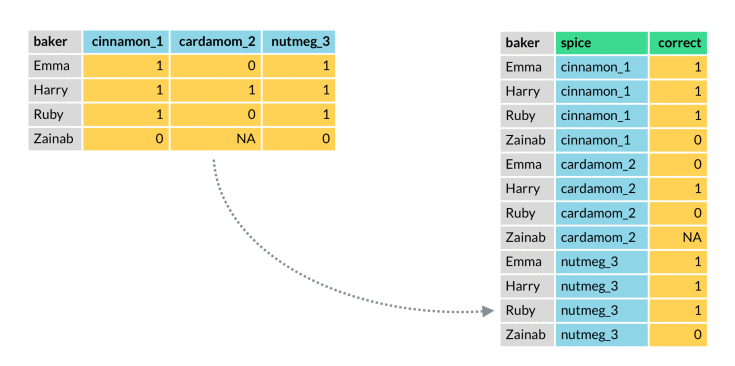

In [ ]:
# Pandas menyediakan fungsi .melt()
# .melt() melakukan unpivot dengan membuat wide dataframe menjadi long dataframe
# Variable menggunakan kolom dengan index 0, Ship Mode dan Segment
df_case2_melted = df_case2.melt(id_vars=[df_case2.columns[0]])
df_case2_melted.sample(5)

,"(Ship Mode, Segment)",variable_0,variable_1,value
7601,2014-10-09,Standard Class,Consumer,30.840
9002,2016-10-20,Standard Class,Corporate,30.336
60,2013-04-07,First Class,Consumer,NaN
785,2016-05-19,First Class,Consumer,NaN
2502,2013-07-26,Same Day,Consumer,NaN


In [ ]:
# Hapus kolom value yang kosong
df_case2_melted.dropna(subset=['value'], inplace=True)
df_case2_melted.reindex()

# Sesuaikan penamaan kolom
df_case2_melted.columns = ['Order Date','Shiping Method', 'Consumer Type','Value']

In [ ]:
# Print dataframe setelah penanganan
df_case2_melted.sample(3)

,Order Date,Shiping Method,Consumer Type,Value
1258,2015-08-27,First Class,Corporate,31.008
8935,2014-03-24,Standard Class,Corporate,6.992
7614,2014-11-13,Standard Class,Consumer,233.064


> Kasus seperti ini pastinya akan sering terjadi. Contoh di atas bukan resep satu untuk semua karena kasus masing-masing unik. Pandas menyediakan beberapa fungsi untuk menangani permasalahan bentuk dataset yang bermasalah. Anda bisa mengecek beberapa fungsi seperti [reshape](https://pandas.pydata.org/docs/user_guide/reshaping.html), [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) dsb.

## Menggabungkan Dua DataFrame 

Jika kita memiliki data yang tersebar ke dalam beberapa atau banyak file dan ingin menganalisisnya secara gabungan. 

Pandas menyediakan berbagai metode untuk menggabungkan dataframe seperti ```.join()``` dan ```.concat()```.

__Contoh Kasus:__

Sumber: https://data.jakarta.go.id/

In [10]:
# Load file satu menjadi dataset
# Diberi nama df_case_bumd2017

df_case_bumd2017 = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/bumd2017.csv')
df_case_bumd2017

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
100,2017,PT Grahasari Suryajaya,Aset,328730722,Data tidak tersedia
101,2017,PT Grahasari Suryajaya,Ekuitas,123856419,Data tidak tersedia
102,2017,PT Grahasari Suryajaya,Pendapatan Usaha,67104107,Data tidak tersedia
103,2017,PT Grahasari Suryajaya,Laba Usaha,428926,Data tidak tersedia


In [11]:
# Load file dua menjadi dataset
# Diberi nama df_case_bumd2018
df_case_bumd2018 = pd.read_csv('https://raw.githubusercontent.com/mofdac/-materi-das/main/04.%20Data%20Preparation/dataset/bumd2018.csv')
df_case_bumd2018

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2018,PD AM Jaya,Aset,1.487470e+09,NaN
1,2018,PD AM Jaya,Ekuitas,-3.099618e+08,NaN
2,2018,PD AM Jaya,Pendapatan Usaha,2.902988e+09,NaN
3,2018,PD AM Jaya,Laba Usaha,1.787775e+08,NaN
4,2018,PD AM Jaya,Laba Bersih,1.995425e+08,NaN
...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.


#### [Concatenate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [ ]:
pd.concat([df_case_bumd2017, df_case_bumd2018],axis=0)

,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.


#### [Append](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [ ]:
df_case_bumd2017.append(df_case_bumd2018)

C:\Users\reza.pratama\AppData\Local\Temp\ipykernel_26276\3877724355.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,tahun,nama_bumd,nama_akun,nilai,keterangan
0,2017,PD AM Jaya,Aset,1360142767,NaN
1,2017,PD AM Jaya,Ekuitas,-509895627,NaN
2,2017,PD AM Jaya,Pendapatan Usaha,2796561019,NaN
3,2017,PD AM Jaya,Laba Usaha,122739741,NaN
4,2017,PD AM Jaya,Laba Bersih,131375112,NaN
...,...,...,...,...,...
110,2018,PT Transportasi Jakarta,Aset,NaN,Data Belum Tersedia.
111,2018,PT Transportasi Jakarta,Ekuitas,NaN,Data Belum Tersedia.
112,2018,PT Transportasi Jakarta,Pendapatan Usaha,NaN,Data Belum Tersedia.
113,2018,PT Transportasi Jakarta,Laba Usaha,NaN,Data Belum Tersedia.


#### [Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

In [ ]:
# Buat dataframe skenario 1
# Copy dari df_case_bumd2017, diberi nama df_case_bumd2017_laba
df_case_bumd2017_laba = df_case_bumd2017[df_case_bumd2017.nama_akun == 'Laba Bersih'].copy()

# Drop kolom nama_akun, keterangan, dan tahun
df_case_bumd2017_laba.drop(columns=['nama_akun','keterangan','tahun'], inplace=True)

# Rename kolom menjadi nama_bumd dan nilai2017
# Simpan dalam bentuk file .csv
df_case_bumd2017_laba.columns = ['nama_bumd', 'nilai2017']
df_case_bumd2017_laba.to_csv('bumd_laba_2017.csv')

# Buat dataframe skenario 2
# Copy dari df_case_bumd2018, diberi nama df_case_bumd2018_laba
df_case_bumd2018_laba = df_case_bumd2018[df_case_bumd2018.nama_akun == 'Laba Bersih'].copy()

# Drop kolom nama_akun, keterangan, dan tahun
df_case_bumd2018_laba.drop(columns=['nama_akun','keterangan','tahun'], inplace=True)

# Rename kolom menjadi nama_bumd dan nilai2018
# Simpan dalam bentuk file .csv
df_case_bumd2018_laba.columns = ['nama_bumd', 'nilai2018']
df_case_bumd2018_laba.to_csv('bumd_laba_2018.csv')

In [ ]:
# Print hasil skenario 1
df_case_bumd2017_laba.sample(3)

,nama_bumd,nilai2017
14,PD Pasar Jaya,93518089
4,PD AM Jaya,131375112
19,PD Pembangunan Sarana Jaya,119436680


In [ ]:
# Print hasil skenario 2
df_case_bumd2018_laba.sample(3)

,nama_bumd,nilai2018
54,PT Grahasari Suryajaya,NaN
4,PD AM Jaya,199542461.3
24,Perumda Pembangunan Sarana Jaya,176535288.3


In [ ]:
# .merge() bisa melakukan setting parameter atas kolom yang di merge dan metode mergenya
# Contoh kasus ini menggunakan metode inner
df_case_bumd2017_laba.merge(df_case_bumd2018_laba, left_on='nama_bumd', right_on='nama_bumd', how="inner").head(10)

,nama_bumd,nilai2017,nilai2018
0,PD AM Jaya,131375112,1.995425e+08
1,PD Dharma Jaya,-,1.454401e+07
2,PD PAL Jaya,39174547,4.273300e+07
3,PT Food Station Tjipinang Jaya,16238344,3.023541e+07
4,PT Bank DKI,712177000,8.003070e+08
5,PT Jakarta Tourisindo,-19723289,-1.545650e+07
6,PT Transportasi Jakarta,261897622,NaN
7,PT Jamkrida Jakarta,4262414,8.730033e+06
8,PT Jakarta Industrial Estate Pulogadung (Persero),85894997,1.162282e+08
9,PT Pembangunan Jaya,1490103079,1.507277e+09


#### [Join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join)

In [ ]:
# Join ke kanan
# Kita beri tambahan nama, agar membedakan antara skenario 1 dan skenario 2
df_case_bumd2017_laba.join(df_case_bumd2018_laba, lsuffix='_caller', rsuffix='_other').sample(3)

,nama_bumd_caller,nilai2017,nama_bumd_other,nilai2018
24,PD PAL Jaya,39174547,Perumda Pembangunan Sarana Jaya,1.765353e+08
94,PT Ratax Armada,-,PT Pakuan,NaN
99,PT Pakuan,-,PT Pembangunan Jaya,1.507277e+09


In [ ]:
# Join ke bawah
# Kolom yang kita join adalah nama_bumd
# Akan ada NaN karena nilai 2017 hanya ada di kolom dia, begitu juga dengan nilai 2018
df_case_bumd2017_laba.join(df_case_bumd2018_laba.set_index('nama_bumd'), on='nama_bumd').head(3)

,nama_bumd,nilai2017,nilai2018
4,PD AM Jaya,131375112,1.995425e+08
9,PD Dharma Jaya,-,1.454401e+07
14,PD Pasar Jaya,93518089,NaN


## Menghapus Duplicate Data

Menghapus data duplikat menggunakan fungsi [.drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).

__Contoh Kasus:__

Kita akan gunakan data dari contoh sebelumnya.

> keep = {‘first’, ‘last’, False}

In [ ]:
# parameter 'first' artinya akan menyimpan nilai pertama kali ditemukan, jika ada yang duplicate
df_case_bumd2017.drop_duplicates(subset=['nama_bumd'],keep='first').sample(3)

,tahun,nama_bumd,nama_akun,nilai,keterangan
5,2017,PD Dharma Jaya,Aset,-,Data belum tersedia
20,2017,PD PAL Jaya,Aset,716222145,NaN
70,2017,PT Kawasan Berikat Nusantara (Persero),Aset,2016633920,NaN


## Menghapus Missing Data

Menghapus missing data bisa menggunakan fungsi ```.dropna()```. 

__Contoh Kasus:__

Kita akan gunakan data dari contoh sebelumnya.

In [ ]:
df_case_bumd2017.dropna(subset=['keterangan']).sample(3)

,tahun,nama_bumd,nama_akun,nilai,keterangan
53,2017,PT Transportasi Jakarta,Laba Usaha,218581868,Unaudited 2017
95,2017,PT Pakuan,Aset,-,Data belum tersedia
89,2017,PT Jakarta International Expo,Laba Bersih,-,Data belum tersedia


> Penanganan missing value sedikit lebih kompleks ketika melakukan analisis data __(tidak sekedar menghapus)__. Hal ini akan dibahas nanti di kasus titanic.

## Membuat Rekapitulasi Data

In [ ]:
# Penting untuk membuat resume atas data sebagai tambahan understanding kita
# Kita akan melakukan grouping dari df_case2_melted
# Menggunakan fungsi Sum, Count dan Mean sebagai value
df_case_group1 = df_case2_melted.groupby(by=['Shiping Method','Consumer Type']).agg(['sum','count','mean'])
df_case_group1

C:\Users\reza.pratama\AppData\Local\Temp\ipykernel_26276\1116101356.py:4: FutureWarning:

['Order Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



Value                   
                                      sum count         mean
Shiping Method Consumer Type                                
First Class    Consumer        20802.1730    72   288.919069
               Corporate       20792.6070    40   519.815175
               Home Office      7737.7860    12   644.815500
Same Day       Consumer         8132.4090    28   290.443179
               Corporate        9907.3080     5  1981.461600
               Home Office      2977.4560     6   496.242667
Second Class   Consumer        49724.2545    91   546.420379
               Corporate       35243.2310    50   704.864620
               Home Office      8791.1270    23   382.222913
Standard Class Consumer       116922.1345   253   462.142824
               Corporate       55942.7865   152   368.044648
               Home Office     54748.6325    90   608.318139

In [ ]:
# Untuk mengisi data yang kosong pada kolom yang sama
# Kita bisa menggunakan fungsi .reset_index()
df_case_group1.reset_index(inplace=True)
df_case_group1.sample(3)

Shiping Method Consumer Type        Value                  
                                         sum count        mean
6    Second Class      Consumer   49724.2545    91  546.420379
9  Standard Class      Consumer  116922.1345   253  462.142824
1     First Class     Corporate   20792.6070    40  519.815175